In [1]:
import numpy as np
import math
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import watermark 

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
phi = np.array([])
theta = np.array([])

#Generate data with angels given phase shift,
#assume that the distance between antenna arrays is
#half of the wave length 
for i in range(181):
    theta = np.append(theta, math.radians(i-90))
    phase = math.degrees(np.pi*np.sin(theta[i]))
    phi = np.append(phi, phase)
    theta[i] = math.degrees(theta[i])
    

In [3]:
#collect these two arrays-- angle and phase shift-- within a
#tensor flow XXXX

my_feature= np.array([])
my_label = np.array([])

my_feature = phi
my_feature = my_feature/180

my_label = theta
my_label = my_label/180

In [4]:
#Define the function that builds the model
def build_model(my_lr):
    model = Sequential()
    
    model = Sequential([
    Dense(units = 120, input_shape=(1,),activation = 'relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 1)
    ])
    
    #Compile model topography
    model.compile(optimizer=Adam(learning_rate =my_lr), loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

In [5]:
def train_model(model, feature, label, epochs, batch_size):
    #train the model by using the fit function
    history= model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch
    
    
    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)
    
    # Specifically gather the model's root mean 
    #squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse


In [6]:
#@title Define the plotting functions
def plot_the_model(m, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("Phase shift (degrees)")
  plt.ylabel("Signal direction (degrees)")

  # Plot the feature values vs. label values.
  plt.scatter(feature*180, label*180, label="True Data")

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = feature*180
  y0 = m*180
  plt.plot(x0, y0, label="Model", c='y')
  plt.title('ML Signal Finder')
  # Render the scatter plot and the red line.
  plt.legend()
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  
  

  plt.plot(epochs, rmse, label="Loss")
  plt.title('Loss Curve')
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.xscale("log")
  plt.show()

Train on 181 samples
Epoch 1/500
181/181 [==============================] - 1s 5ms/sample - loss: 0.1104 - root_mean_squared_error: 0.3323
Epoch 2/500
181/181 [==============================] - 0s 55us/sample - loss: 0.0934 - root_mean_squared_error: 0.3057
Epoch 3/500
181/181 [==============================] - 0s 46us/sample - loss: 0.0782 - root_mean_squared_error: 0.2796
Epoch 4/500
181/181 [==============================] - 0s 37us/sample - loss: 0.0665 - root_mean_squared_error: 0.2578
Epoch 5/500
181/181 [==============================] - 0s 21us/sample - loss: 0.0578 - root_mean_squared_error: 0.2403
Epoch 6/500
181/181 [==============================] - 0s 45us/sample - loss: 0.0505 - root_mean_squared_error: 0.2247
Epoch 7/500
181/181 [==============================] - 0s 27us/sample - loss: 0.0440 - root_mean_squared_error: 0.2097
Epoch 8/500
181/181 [==============================] - 0s 78us/sample - loss: 0.0380 - root_mean_squared_error: 0.1949
Epoch 9/500
181/181 [=======

Epoch 69/500
181/181 [==============================] - 0s 41us/sample - loss: 7.6859e-04 - root_mean_squared_error: 0.0277
Epoch 70/500
181/181 [==============================] - 0s 39us/sample - loss: 7.6210e-04 - root_mean_squared_error: 0.0276
Epoch 71/500
181/181 [==============================] - 0s 57us/sample - loss: 7.5800e-04 - root_mean_squared_error: 0.0275
Epoch 72/500
181/181 [==============================] - 0s 39us/sample - loss: 7.5316e-04 - root_mean_squared_error: 0.0274
Epoch 73/500
181/181 [==============================] - 0s 60us/sample - loss: 7.4731e-04 - root_mean_squared_error: 0.0273
Epoch 74/500
181/181 [==============================] - 0s 36us/sample - loss: 7.3688e-04 - root_mean_squared_error: 0.0271
Epoch 75/500
181/181 [==============================] - 0s 41us/sample - loss: 7.2672e-04 - root_mean_squared_error: 0.0270
Epoch 76/500
181/181 [==============================] - 0s 39us/sample - loss: 7.1758e-04 - root_mean_squared_error: 0.0268
Epoch 77

Epoch 135/500
181/181 [==============================] - 0s 18us/sample - loss: 4.4651e-04 - root_mean_squared_error: 0.0211
Epoch 136/500
181/181 [==============================] - 0s 22us/sample - loss: 4.4255e-04 - root_mean_squared_error: 0.0210
Epoch 137/500
181/181 [==============================] - 0s 24us/sample - loss: 4.3866e-04 - root_mean_squared_error: 0.0209
Epoch 138/500
181/181 [==============================] - 0s 10us/sample - loss: 4.3522e-04 - root_mean_squared_error: 0.0209
Epoch 139/500
181/181 [==============================] - 0s 28us/sample - loss: 4.3134e-04 - root_mean_squared_error: 0.0208
Epoch 140/500
181/181 [==============================] - 0s 25us/sample - loss: 4.2767e-04 - root_mean_squared_error: 0.0207
Epoch 141/500
181/181 [==============================] - 0s 29us/sample - loss: 4.2425e-04 - root_mean_squared_error: 0.0206
Epoch 142/500
181/181 [==============================] - 0s 23us/sample - loss: 4.2080e-04 - root_mean_squared_error: 0.0205


Epoch 201/500
181/181 [==============================] - 0s 49us/sample - loss: 2.6322e-04 - root_mean_squared_error: 0.0162
Epoch 202/500
181/181 [==============================] - 0s 68us/sample - loss: 2.6166e-04 - root_mean_squared_error: 0.0162
Epoch 203/500
181/181 [==============================] - 0s 49us/sample - loss: 2.5955e-04 - root_mean_squared_error: 0.0161
Epoch 204/500
181/181 [==============================] - 0s 50us/sample - loss: 2.5707e-04 - root_mean_squared_error: 0.0160
Epoch 205/500
181/181 [==============================] - 0s 49us/sample - loss: 2.5490e-04 - root_mean_squared_error: 0.0160
Epoch 206/500
181/181 [==============================] - 0s 55us/sample - loss: 2.5300e-04 - root_mean_squared_error: 0.0159
Epoch 207/500
181/181 [==============================] - 0s 59us/sample - loss: 2.5129e-04 - root_mean_squared_error: 0.0159
Epoch 208/500
181/181 [==============================] - 0s 53us/sample - loss: 2.4937e-04 - root_mean_squared_error: 0.0158


Epoch 267/500
181/181 [==============================] - 0s 50us/sample - loss: 1.5221e-04 - root_mean_squared_error: 0.0123
Epoch 268/500
181/181 [==============================] - 0s 61us/sample - loss: 1.5095e-04 - root_mean_squared_error: 0.0123
Epoch 269/500
181/181 [==============================] - 0s 47us/sample - loss: 1.4967e-04 - root_mean_squared_error: 0.0122
Epoch 270/500
181/181 [==============================] - 0s 51us/sample - loss: 1.4842e-04 - root_mean_squared_error: 0.0122
Epoch 271/500
181/181 [==============================] - 0s 60us/sample - loss: 1.4716e-04 - root_mean_squared_error: 0.0121
Epoch 272/500
181/181 [==============================] - 0s 42us/sample - loss: 1.4592e-04 - root_mean_squared_error: 0.0121
Epoch 273/500
181/181 [==============================] - 0s 47us/sample - loss: 1.4473e-04 - root_mean_squared_error: 0.0120
Epoch 274/500
181/181 [==============================] - 0s 50us/sample - loss: 1.4349e-04 - root_mean_squared_error: 0.0120


Epoch 333/500
181/181 [==============================] - 0s 52us/sample - loss: 9.4058e-05 - root_mean_squared_error: 0.0097
Epoch 334/500
181/181 [==============================] - 0s 40us/sample - loss: 9.3013e-05 - root_mean_squared_error: 0.0096
Epoch 335/500
181/181 [==============================] - 0s 72us/sample - loss: 9.2880e-05 - root_mean_squared_error: 0.0096
Epoch 336/500
181/181 [==============================] - 0s 43us/sample - loss: 9.1900e-05 - root_mean_squared_error: 0.0096
Epoch 337/500
181/181 [==============================] - 0s 47us/sample - loss: 9.0796e-05 - root_mean_squared_error: 0.0095
Epoch 338/500
181/181 [==============================] - 0s 52us/sample - loss: 9.0928e-05 - root_mean_squared_error: 0.0095
Epoch 339/500
181/181 [==============================] - 0s 61us/sample - loss: 9.0454e-05 - root_mean_squared_error: 0.0095
Epoch 340/500
181/181 [==============================] - 0s 28us/sample - loss: 8.9662e-05 - root_mean_squared_error: 0.0095


Epoch 399/500
181/181 [==============================] - 0s 33us/sample - loss: 6.6253e-05 - root_mean_squared_error: 0.0081
Epoch 400/500
181/181 [==============================] - 0s 53us/sample - loss: 6.6559e-05 - root_mean_squared_error: 0.0082
Epoch 401/500
181/181 [==============================] - 0s 54us/sample - loss: 6.6349e-05 - root_mean_squared_error: 0.0081
Epoch 402/500
181/181 [==============================] - 0s 60us/sample - loss: 6.6071e-05 - root_mean_squared_error: 0.0081
Epoch 403/500
181/181 [==============================] - 0s 27us/sample - loss: 6.5402e-05 - root_mean_squared_error: 0.0081
Epoch 404/500
181/181 [==============================] - 0s 90us/sample - loss: 6.4805e-05 - root_mean_squared_error: 0.0081
Epoch 405/500
181/181 [==============================] - 0s 50us/sample - loss: 6.4498e-05 - root_mean_squared_error: 0.0080
Epoch 406/500
181/181 [==============================] - 0s 61us/sample - loss: 6.4183e-05 - root_mean_squared_error: 0.0080


Epoch 465/500
181/181 [==============================] - 0s 51us/sample - loss: 5.1528e-05 - root_mean_squared_error: 0.0072
Epoch 466/500
181/181 [==============================] - 0s 27us/sample - loss: 5.1408e-05 - root_mean_squared_error: 0.0072
Epoch 467/500
181/181 [==============================] - 0s 80us/sample - loss: 5.1201e-05 - root_mean_squared_error: 0.0072
Epoch 468/500
181/181 [==============================] - 0s 50us/sample - loss: 5.1389e-05 - root_mean_squared_error: 0.0072
Epoch 469/500
181/181 [==============================] - 0s 72us/sample - loss: 5.1442e-05 - root_mean_squared_error: 0.0072
Epoch 470/500
181/181 [==============================] - 0s 39us/sample - loss: 5.1031e-05 - root_mean_squared_error: 0.0071
Epoch 471/500
181/181 [==============================] - 0s 30us/sample - loss: 5.0907e-05 - root_mean_squared_error: 0.0071
Epoch 472/500
181/181 [==============================] - 0s 46us/sample - loss: 5.0515e-05 - root_mean_squared_error: 0.0071


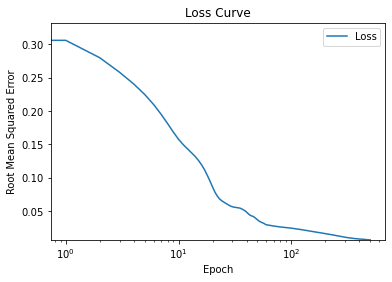

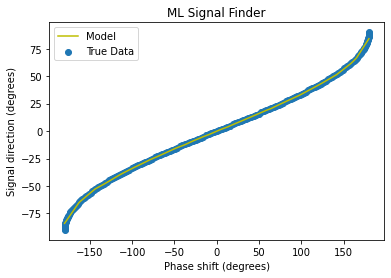

In [7]:
learning_rate=0.001
epochs=500
my_batch_size=181

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

y0 = my_model.predict(my_feature)
plot_the_loss_curve(epochs, rmse)
plot_the_model(y0, my_feature, my_label)

In [11]:
%load_ext watermark

%watermark -v -m -p math

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.7
IPython 7.16.1

math unknown

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores  : 8
interpreter: 64bit
